In [1]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('data/train_new.csv')

In [3]:
# df = pd.DataFrame({
#     'value': list(range(1, 30))
# })

# df['mean_2_weeks'] = df['value'].rolling(window=2).mean()
# df['target'] = df['value'].shift(-1)

# df

In [29]:
import pandas as pd

def create_features(df):
    for i in range(7):
        df[f'feature_{i}_weeks_ago'] = df['target'].shift(i)
    
    for i in [3, 7, 15]:
        df[f'feature_mean_last_{i}_weeks'] = df['target'].rolling(window=i).mean()

    # df['ratio_yesterday_to_day_before_yesterday'] = df['value_yesterday'] / df['value_day_before_yesterday']

    bad_cols = [col for col in df.columns if 'feature' not in col and col != 'target']
    df.drop(bad_cols, axis=1, inplace=True)

    for i in range(1, 29):
        df[f'target_{i}'] = df['target'].shift(-i)
    
    return df

df = create_features(df)
df = df.dropna().reset_index(drop=True)

In [47]:
test_size = 0.4

train_data, valid_data = df[:int(len(df) * (1-test_size))], df[int(len(df) * (1-test_size)):]

cur_preds = []
for i in range(1, 29):
    print(f'Предсказываение на {i} недель вперед')
    X_train, y_train = train_data.drop([x for x in train_data.columns if 'target' in x], axis=1), train_data[f'target_{i}']
    X_valid, y_valid = valid_data.drop([x for x in valid_data.columns if 'target' in x], axis=1), valid_data[f'target_{i}']


    model = CatBoostRegressor(
        depth=2,
        iterations=3000,
        loss_function='MAPE',
        eval_metric='R2',

        # learning_rate=0.0158,
        # l2_leaf_reg=3.1954,
        # random_strength=1.91,
        # border_count=138,
        # grow_policy='Depthwise',

        random_state=42,
        thread_count=4,
        early_stopping_rounds=500
    )

    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

    preds = model.predict(X_valid)
    cur_preds.append(preds[0])

    print(f'R2: {round(metrics.r2_score(y_valid, preds), 5)}')
    print(f'MAPE: {round(metrics.mean_absolute_percentage_error(y_valid, preds), 5)}')
    
    print()

Предсказываение на 1 недель вперед
R2: -0.79306
MAPE: 0.20459

Предсказываение на 2 недель вперед
R2: -0.74705
MAPE: 0.20115

Предсказываение на 3 недель вперед
R2: -0.97526
MAPE: 0.22211

Предсказываение на 4 недель вперед
R2: -1.07562
MAPE: 0.22966

Предсказываение на 5 недель вперед
R2: -1.03932
MAPE: 0.22707

Предсказываение на 6 недель вперед
R2: -0.95704
MAPE: 0.22047

Предсказываение на 7 недель вперед
R2: -0.92752
MAPE: 0.21477

Предсказываение на 8 недель вперед
R2: -0.86692
MAPE: 0.20912

Предсказываение на 9 недель вперед
R2: -0.80753
MAPE: 0.20463

Предсказываение на 10 недель вперед
R2: -0.76518
MAPE: 0.20012

Предсказываение на 11 недель вперед
R2: -0.71753
MAPE: 0.19609

Предсказываение на 12 недель вперед
R2: -0.63982
MAPE: 0.19195

Предсказываение на 13 недель вперед
R2: -0.58215
MAPE: 0.18742

Предсказываение на 14 недель вперед
R2: -0.53443
MAPE: 0.1845

Предсказываение на 15 недель вперед
R2: -0.47471
MAPE: 0.18079

Предсказываение на 16 недель вперед
R2: -0.41121
M

<Axes: >

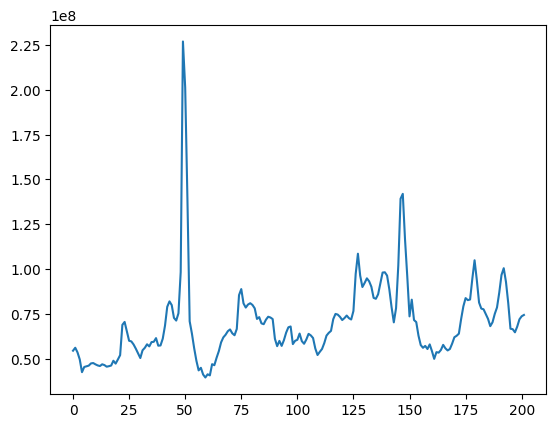

In [50]:
df['target'].plot()

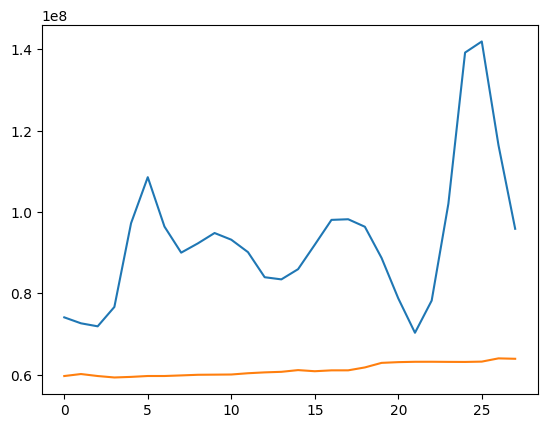

In [48]:
plt.plot(valid_data['target_1'].tolist()[:28])
plt.plot(cur_preds)